In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
# import matplotlib
# matplotlib.rcParams.update({'font.size':18})
# matplotlib.rcParams.update({'font.family':'serif'})

# https://github.com/dhaitz/mplcyberpunk
import mplcyberpunk
plt.style.use("cyberpunk")

## Puzzle 1

In [98]:
df = pd.read_table('input.txt', delimiter=',', names=('x0', 'y0x1', 'y1'))
# split the middle column into numbers
df[['y0', 'x1']] = df['y0x1'].str.split(' -> ', expand=True)

len(df)

500

In [99]:
sum((df['x1'].astype('float') == df['x0'].astype('float')) | 
    (df['y1'].astype('float') == df['y0'].astype('float')))
# sum(df['y1'].astype('float') - df['y0'].astype('float') ==0)

321

In [100]:
xmin = np.nanmin([df['x0'].astype('int'), df['x1'].astype('int')])
xmax = np.nanmax([df['x0'].astype('int'), df['x1'].astype('int')])
ymin = np.nanmin([df['y0'].astype('int'), df['y1'].astype('int')])
ymax = np.nanmax([df['y0'].astype('int'), df['y1'].astype('int')])
print(xmin, xmax, ymin, ymax)

10 988 11 989


In [101]:
img = np.zeros((int(xmax-xmin)+1, int(ymax-ymin)+1))
# img.shape

for k in range(len(df)):
#     if ((df['x0'].astype('float')[k] == df['x1'].astype('float')[k]) | 
#         (df['y0'].astype('float')[k] == df['y1'].astype('float')[k])):
    xmink = int(np.nanmin([df['x0'].astype('int')[k], df['x1'].astype('int')[k]]) -xmin)
    xmaxk = int(np.nanmax([df['x0'].astype('int')[k], df['x1'].astype('int')[k]]) -xmin)
    ymink = int(np.nanmin([df['y0'].astype('int')[k], df['y1'].astype('int')[k]]) -ymin)
    ymaxk = int(np.nanmax([df['y0'].astype('int')[k], df['y1'].astype('int')[k]]) -ymin)

#     print(xmink, xmaxk, ymink, ymaxk)
    if xmink==xmaxk:
        img[xmink, ymink:(ymaxk+1)] += 1
    if ymink==ymaxk:
        img[xmink:(xmaxk+1), ymink] += 1

<IPython.core.display.Javascript object>


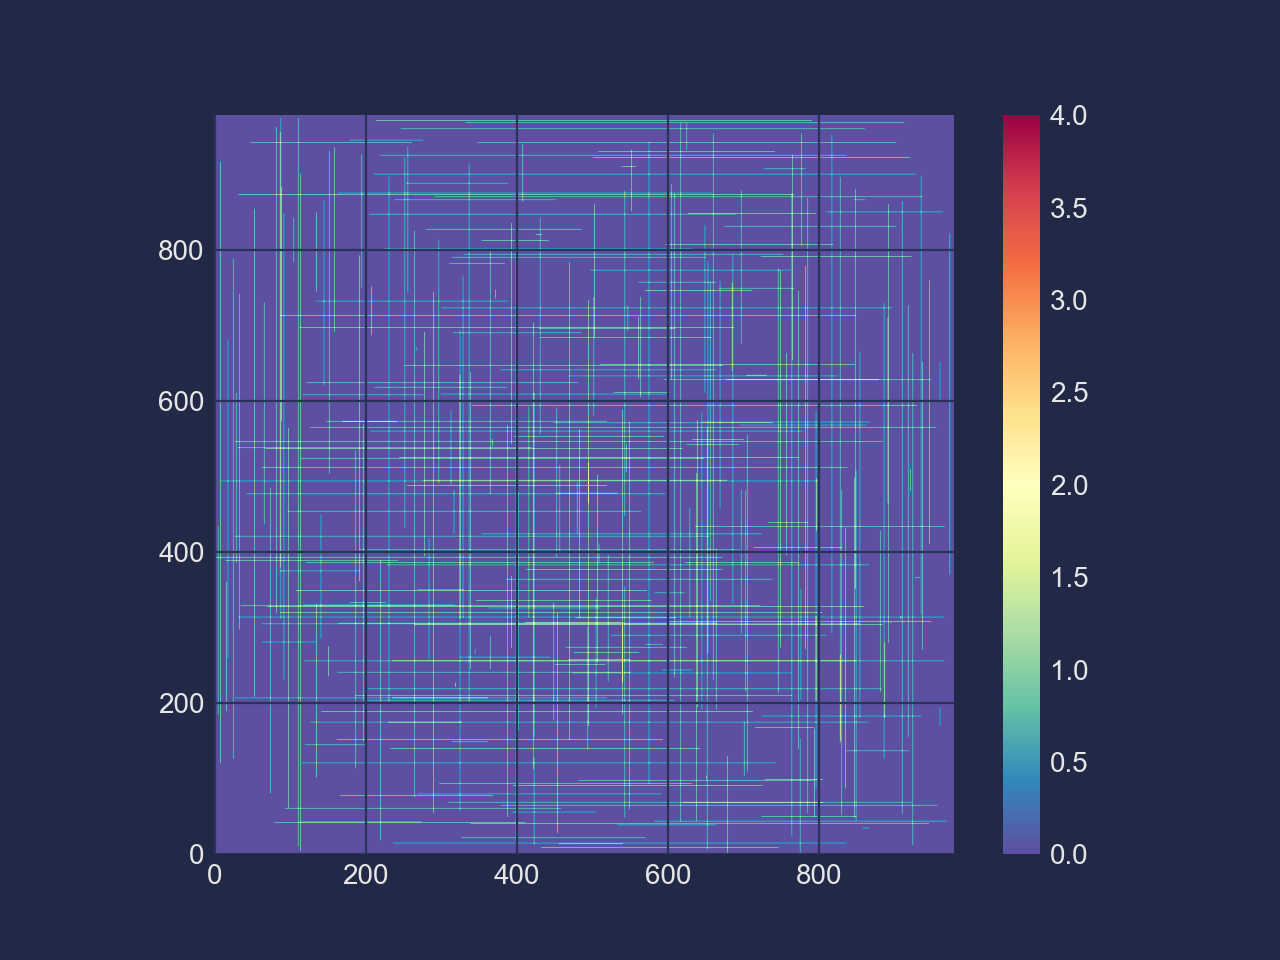

In [102]:
plt.imshow(img, cmap=plt.cm.Spectral_r, origin='lower')
plt.colorbar()

In [103]:
for k in range(int(np.max(img)+2)):
    print(k, np.sum(img >= k))

0 958441
1 102013
2 4655
3 124
4 3
5 0


In [104]:
# the answer:
np.sum(img >= 2)

4655

## Puzzle 2

In [159]:
df = pd.read_table('input.txt', delimiter=',', names=('x0', 'y0x1', 'y1'))
# split the middle column into numbers
df[['y0', 'x1']] = df['y0x1'].str.split(' -> ', expand=True)

len(df)

500

In [169]:
xmin = np.nanmin([df['x0'].astype('int'), df['x1'].astype('int')])
xmax = np.nanmax([df['x0'].astype('int'), df['x1'].astype('int')])
ymin = np.nanmin([df['y0'].astype('int'), df['y1'].astype('int')])
ymax = np.nanmax([df['y0'].astype('int'), df['y1'].astype('int')])

img = np.zeros((int(xmax-xmin)+1, int(ymax-ymin)+1))

for k in range(len(df)):
    xmink = int(np.nanmin([df['x0'].astype('int')[k], df['x1'].astype('int')[k]]) -xmin)
    xmaxk = int(np.nanmax([df['x0'].astype('int')[k], df['x1'].astype('int')[k]]) -xmin)
    ymink = int(np.nanmin([df['y0'].astype('int')[k], df['y1'].astype('int')[k]]) -ymin)
    ymaxk = int(np.nanmax([df['y0'].astype('int')[k], df['y1'].astype('int')[k]]) -ymin)

    if xmink==xmaxk:
        img[xmink, ymink:(ymaxk+1)] += 1
    if ymink==ymaxk:
        img[xmink:(xmaxk+1), ymink] += 1
    if (ymink != ymaxk) & (xmink != xmaxk):
        xstp = 1
        if df['x1'].astype('int')[k] < df['x0'].astype('int')[k]:
            xstp = -1
        ystp = 1
        if df['y1'].astype('int')[k] < df['y0'].astype('int')[k]:
            ystp = -1
        img[list(range(df['x0'].astype('int')[k] -xmin, df['x1'].astype('int')[k] -xmin+xstp, xstp)), 
            list(range(df['y0'].astype('int')[k] -ymin, df['y1'].astype('int')[k] -ymin+ystp, ystp))] += 1
        
# the answer:
np.sum(img >= 2)

20500